# Code to perform linear regression using gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generating input data

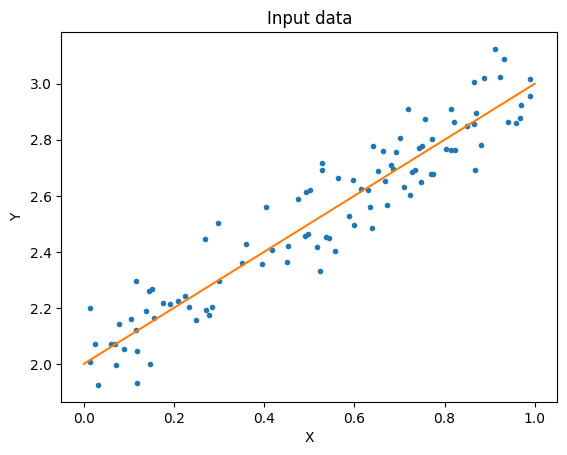

In [2]:
Slope = 1
Intercept = 2

NumberPoints = 100
NoiseVariance = 0.1

Xmin = 0
Xmax = 1

Ymin = Slope * Xmin + Intercept
Ymax = Slope * Xmax + Intercept

PointX = (Xmax-Xmin) * np.random.rand( NumberPoints , 1 ) + Xmin
PointY = Slope * PointX + Intercept

PointY = PointY + NoiseVariance * np.random.randn( NumberPoints , 1  )

plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.title( 'Input data' )
plt.show()

### Perform gradient descent to find the best fit line

Let the $i$ th data point be: <br>
$\{ x_i , y_i \}$ <br>
where $i \in \{1,2,...N\}$, with $N$ data points. <br>
<br>
Our goal is to fit the line of the form $y = m x + c$ <br>
<br>
Let the initial estimate for slope and intercept be: $m_0$, $c_0$ <br>
Then the estimated $y_i$'s are <br>
$\bar{y}_i := m_0 x_i + c_0$ <br>
<br>
We define the squared error function   $E( m , c ) := \sum_{i=1}^{N} (y_i - \bar{y}_i)^2$ <br>
<br>
Now, the parameters $(m,c)$ are updated using the gradient descent algorithm as: <br>
$m \;\; \rightarrow \;\; m - \eta  \frac{\partial E}{\partial m} \;\;\; = \;\;\; m + \eta \sum_{i=1}^{N} 2 (y_i - \bar{y}_i) x_i $ <br>
$c \;\;\; \rightarrow \;\;\; c - \eta  \frac{\partial E}{\partial c} \;\;\;\; = \;\;\;\; c + \eta \sum_{i=1}^{N} 2 (y_i - \bar{y}_i) $ <br>
<br>
where, $\eta$ is the $Learning \; rate$.


Error =  648.4228674708346 Estimated Slope =  0.2813673115131203 Estimated Intercept 0.5056863124046741
Error =  356.84428456237555 Estimated Slope =  0.48962341560902267 Estimated Intercept 0.8807696209833565
Error =  196.58853305885583 Estimated Slope =  0.6436823747377145 Estimated Intercept 1.1590269806770894
Error =  108.5092399914925 Estimated Slope =  0.7575662107381008 Estimated Intercept 1.3654992905222516
Error =  60.09892605316333 Estimated Slope =  0.8416701960390591 Estimated Intercept 1.5187508359543471
Error =  33.49113256920886 Estimated Slope =  0.9037008865521249 Estimated Intercept 1.632544417055214
Error =  18.866262273185157 Estimated Slope =  0.949371539219662 Estimated Intercept 1.7170832171575081
Error =  10.827358932863811 Estimated Slope =  0.98291766489994 Estimated Intercept 1.7799314712386363
Error =  6.408197104527457 Estimated Slope =  1.0074792372665387 Estimated Intercept 1.8266970101851994
Error =  3.9785069763365026 Estimated Slope =  1.02538404616712

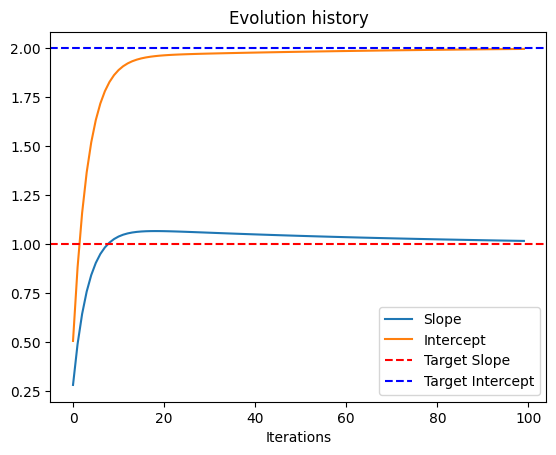

In [3]:
SlopeEstimate = 0
InterceptEstimate = 0

NumberIterations = 100
LearningRate = 0.001

SlopeHistory = []
InterceptHistory = []

for It in range( NumberIterations ):
    PointYEstimate = SlopeEstimate * PointX + InterceptEstimate

    Error = np.sum( ( PointY - PointYEstimate )**2 )
    dError_dSlope = np.sum( -2 * ( PointY - PointYEstimate ) * PointX )
    dError_dIntercept = np.sum( -2 * ( PointY - PointYEstimate ) )

    SlopeEstimate = SlopeEstimate - LearningRate * dError_dSlope
    InterceptEstimate = InterceptEstimate - LearningRate * dError_dIntercept

    SlopeHistory = np.append( SlopeHistory , SlopeEstimate )
    InterceptHistory = np.append( InterceptHistory , InterceptEstimate )

    print("Error = ",Error, "Estimated Slope = ",SlopeEstimate, "Estimated Intercept",InterceptEstimate) 

plt.plot( SlopeHistory )
plt.plot( InterceptHistory )
plt.axhline( y=Slope , color='r' , linestyle='--' )
plt.axhline( y=Intercept , color='b' , linestyle='--' )
plt.legend( ['Slope','Intercept','Target Slope','Target Intercept'])
plt.title( 'Evolution history' )
plt.xlabel( 'Iterations' )
plt.show()

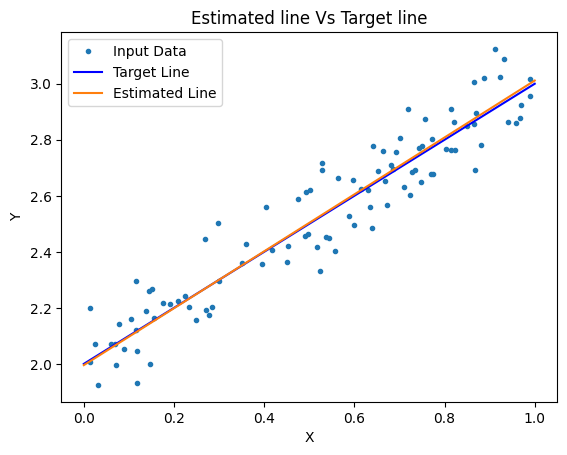

In [4]:
plt.plot( PointX , PointY , '.' )
plt.plot( [Xmin,Xmax] , [Ymin,Ymax] , 'b' )
plt.plot( [Xmin,Xmax] , [SlopeEstimate*Xmin+InterceptEstimate , SlopeEstimate*Xmax+InterceptEstimate])
plt.title( 'Estimated line Vs Target line' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.legend( ['Input Data','Target Line','Estimated Line'] )
plt.show()